In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

In [39]:
df1 = pd.read_csv('/content/HousePricePrediction.csv')
df1.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
946,947,80,RL,70.0,8163,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,143000
1066,1067,60,RL,59.0,7837,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,178000
42,43,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000
680,681,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,143000
343,344,120,RL,63.0,8849,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,266000


In [40]:
cat_cols = df1.select_dtypes(include=['object'])
num_cols = df1.select_dtypes(include=['int64', 'float64'])

In [41]:
df1[cat_cols.columns] = df1[cat_cols.columns].fillna('None')

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in cat_cols.columns:
    df1[i] = le.fit_transform(df1[i])

In [43]:
corr = df1.corr()['SalePrice']
selected = corr[abs(corr) > 0.4]
selected

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
ExterQual      -0.636884
BsmtQual       -0.593734
TotalBsmtSF     0.613581
HeatingQC      -0.400178
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
KitchenQual    -0.589189
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageType     -0.415283
GarageYrBlt     0.486362
GarageFinish   -0.425684
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [44]:
df1 = df1[selected.index.to_list()]

In [45]:
df1.corrwith(df1['SalePrice']).abs().sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
ExterQual       0.636884
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.593734
KitchenQual     0.589189
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
GarageFinish    0.425684
GarageType      0.415283
HeatingQC       0.400178
dtype: float64

In [46]:
df1 = df1[['OverallQual','GrLivArea','GarageCars','ExterQual','SalePrice']]
x_train, x_test, y_train, y_test = train_test_split(df1.drop(columns = ['SalePrice']), df1['SalePrice'], test_size = 0.25,random_state = 42)

In [47]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [48]:
y_train_pred_linear = model1.predict(x_train)
y_test_pred_linear = model1.predict(x_test)
mae_train_linear = mean_absolute_error(y_train,y_train_pred_linear)
mae_test_linear = mean_absolute_error(y_test,y_test_pred_linear)
print('Train MAE:',mae_train_linear,'\nTest MAE:',mae_test_linear)

Train MAE: 26151.325665166038 
Test MAE: 26611.218862247028


In [49]:
y_pred = model1.predict(x_test)

In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7824121391390594

Polynomial Regression

In [51]:
poly = PolynomialFeatures(degree = 2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
model2 = LinearRegression()
model2.fit(x_train_poly,y_train)

LinearRegression()

In [52]:
y_pred_poly = model2.predict(x_train_poly)

In [53]:
y_train_pred_poly = model2.predict(x_train_poly)
y_test_pred_poly = model2.predict(x_test_poly)
mae_train_poly = mean_absolute_error(y_train,y_train_pred_poly)
mae_test_poly = mean_absolute_error(y_test,y_test_pred_poly)
print('Train MAE:',mae_train_poly,'\nTest MAE:',mae_test_poly)

Train MAE: 24064.996426719816 
Test MAE: 23891.087783713607


In [54]:
r2_score(y_test, model2.predict(x_test_poly))

0.8186512260824257

In [55]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.utils import to_categorical,plot_model
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [56]:
x_train, x_test, y_train, y_test = train_test_split(df2.drop(columns = ['target']), df2['target'], test_size = 0.25,random_state = 42)

In [57]:
from sklearn.compose import ColumnTransformer
scaler = MinMaxScaler()
cols_to_scale = ['age','trestbps','chol','thalach','oldpeak']

In [58]:
scaler.fit(x_train[cols_to_scale])
x_train[cols_to_scale] = scaler.transform(x_train[cols_to_scale])
x_test[cols_to_scale] = scaler.transform(x_test[cols_to_scale])

In [59]:
!pip install tensorFlow

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import warnings
import seaborn as sb
warnings.filterwarnings("ignore")

In [68]:
X_train,X_part,y_train,y_part = train_test_split(df1.drop(columns = ['SalePrice']),df1['SalePrice'],test_size = .2,random_state = 42)
X_test,X_valid,y_test,y_valid = train_test_split(X_part,y_part,test_size = 0.1,random_state = 42)

In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [70]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(Dense(16, input_dim=input_dim, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_percentage_error', optimizer=Adam())

early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                               restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=120, batch_size=32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping])

Epoch 1/120
37/37 [==============================] - 1s 6ms/step - loss: 99.9996 - val_loss: 99.9991
Epoch 2/120
37/37 [==============================] - 0s 3ms/step - loss: 99.9986 - val_loss: 99.9971
Epoch 3/120
37/37 [==============================] - 0s 3ms/step - loss: 99.9957 - val_loss: 99.9918
Epoch 4/120
37/37 [==============================] - 0s 3ms/step - loss: 99.9885 - val_loss: 99.9778
Epoch 5/120
37/37 [==============================] - 0s 3ms/step - loss: 99.9691 - val_loss: 99.9425
Epoch 6/120
37/37 [==============================] - 0s 2ms/step - loss: 99.9240 - val_loss: 99.8622
Epoch 7/120
37/37 [==============================] - 0s 3ms/step - loss: 99.8259 - val_loss: 99.6973
Epoch 8/120
37/37 [==============================] - 0s 3ms/step - loss: 99.6316 - val_loss: 99.3838
Epoch 9/120
37/37 [==============================] - 0s 3ms/step - loss: 99.2885 - val_loss: 98.8440
Epoch 10/120
37/37 [==============================] - 0s 2ms/step - loss: 98.7210 - val_los

In [71]:
import matplotlib.pyplot as plt
import seaborn as sb

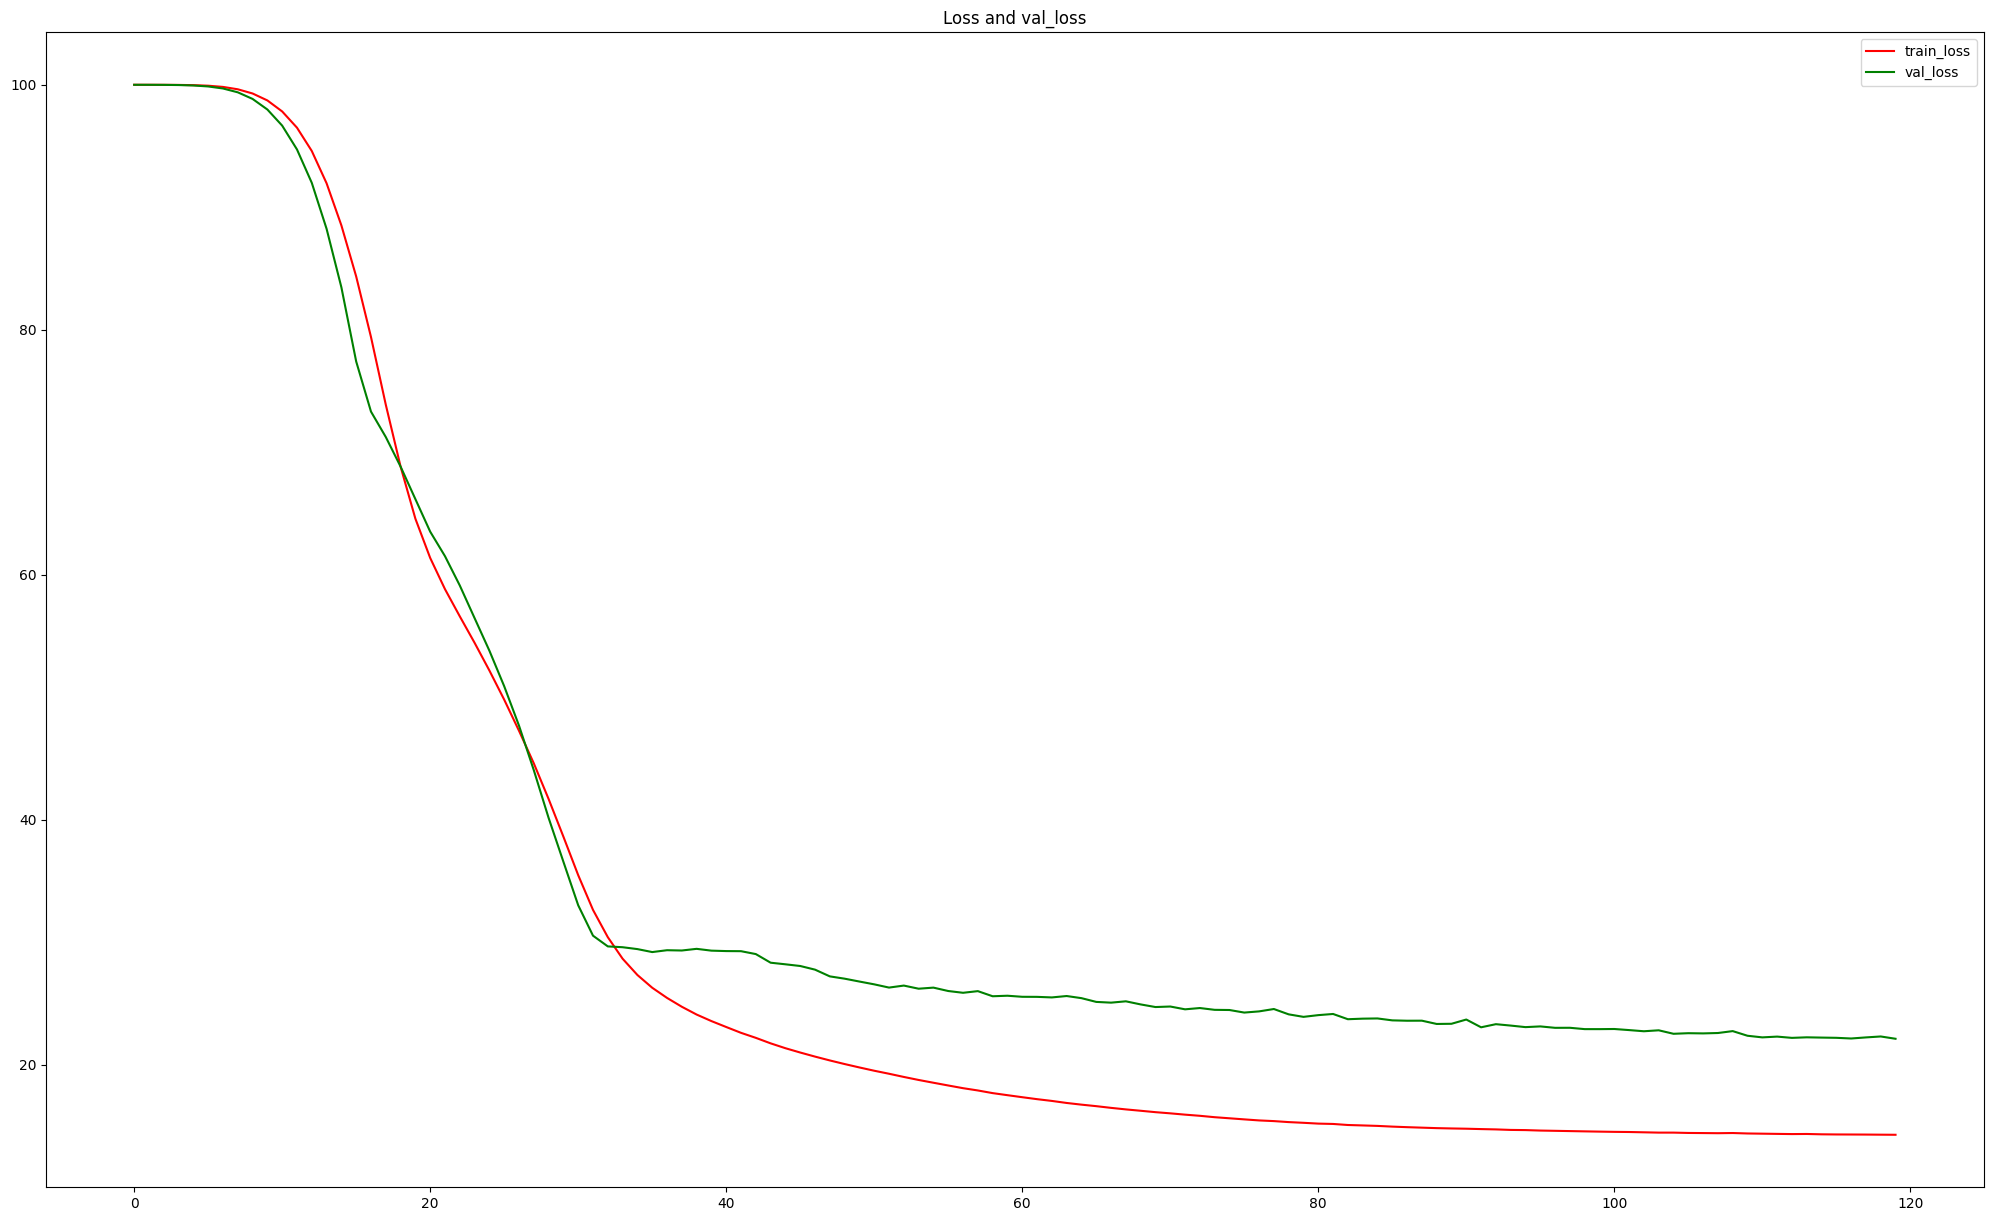

In [72]:
plt.figure(figsize = (25,15))
plt.plot(history.history['loss'],color = 'red',label = 'train_loss')
plt.title('Loss and val_loss')
plt.plot(history.history['val_loss'],color = 'green',label = 'val_loss')
plt.legend()

In [73]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

9/9 [==============================] - 0s 2ms/step


0.7974360490444766

In [74]:
df2 = pd.read_csv('/content/heart.csv')

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [89]:
heart_train,heart_part,y2_train,y2_part = train_test_split(df2.drop(columns = ['target']),df2['target'],test_size = .2,random_state = 42)
heart_valid,heart_test,y2_valid,y2_test = train_test_split(heart_part,y2_part,test_size = 0.1,random_state = 42)

In [90]:
scaler = StandardScaler()
heart_train = scaler.fit_transform(heart_train)
heart_valid = scaler.fit_transform(heart_valid)
heart_test = scaler.fit_transform(heart_test)

In [91]:
input_dim = heart_train.shape[1]
model2 = Sequential()
model2.add(Dense(12, input_dim=input_dim, activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer=Adam(),metrics = ['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10,
                               restore_best_weights=True)

history2 = model2.fit(heart_train, y2_train, epochs=120, batch_size=32,
                    validation_data=(heart_valid, y2_valid),
                    callbacks=[early_stopping])

Epoch 1/120
8/8 [==============================] - 1s 26ms/step - loss: 0.7920 - accuracy: 0.5537 - val_loss: 0.6687 - val_accuracy: 0.5556
Epoch 2/120
8/8 [==============================] - 0s 9ms/step - loss: 0.7476 - accuracy: 0.5579 - val_loss: 0.6320 - val_accuracy: 0.5741
Epoch 3/120
8/8 [==============================] - 0s 6ms/step - loss: 0.7107 - accuracy: 0.5702 - val_loss: 0.6029 - val_accuracy: 0.6111
Epoch 4/120
8/8 [==============================] - 0s 6ms/step - loss: 0.6780 - accuracy: 0.6240 - val_loss: 0.5804 - val_accuracy: 0.6852
Epoch 5/120
8/8 [==============================] - 0s 10ms/step - loss: 0.6509 - accuracy: 0.6364 - val_loss: 0.5604 - val_accuracy: 0.7037
Epoch 6/120
8/8 [==============================] - 0s 6ms/step - loss: 0.6290 - accuracy: 0.6612 - val_loss: 0.5423 - val_accuracy: 0.7407
Epoch 7/120
8/8 [==============================] - 0s 6ms/step - loss: 0.6068 - accuracy: 0.6860 - val_loss: 0.5279 - val_accuracy: 0.7407
Epoch 8/120
8/8 [========

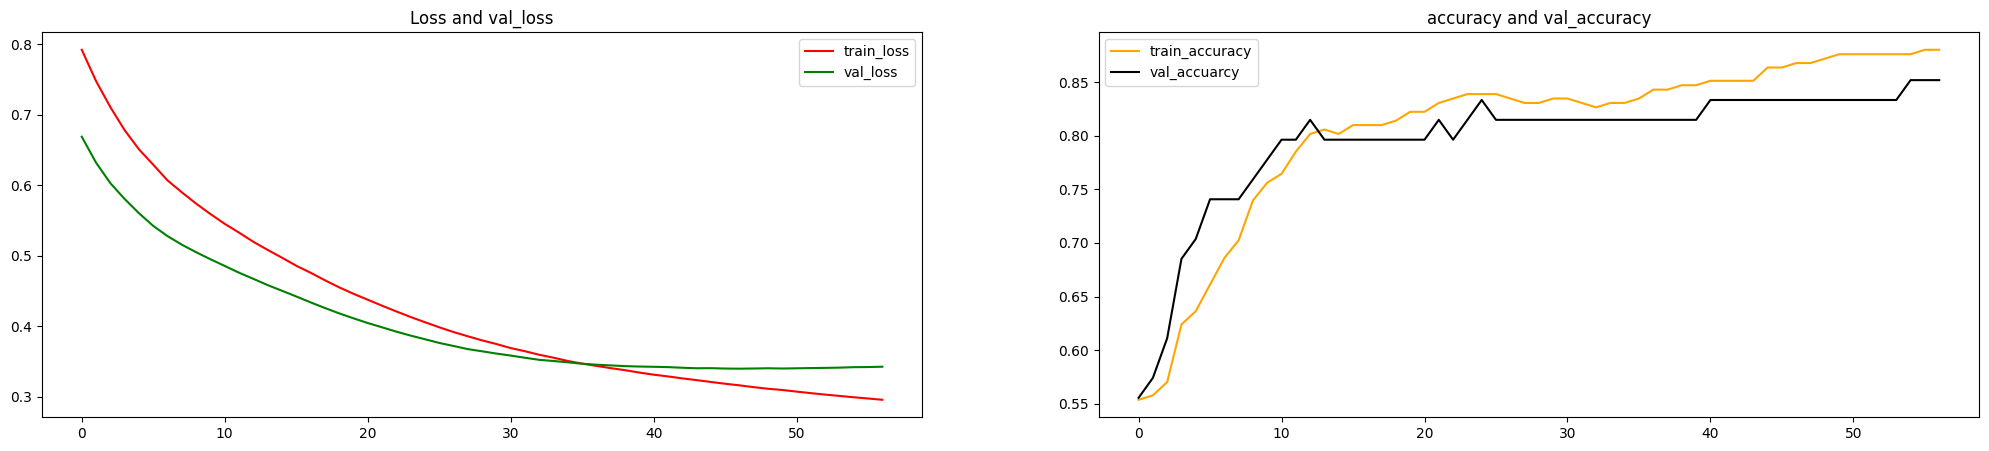

In [92]:
fig,ax = plt.subplots(1,2,figsize = (25,5))
ax[0].plot(history2.history['loss'],color = 'red',label = 'train_loss')
ax[0].set_title('Loss and val_loss')
ax[0].plot(history2.history['val_loss'],color = 'green',label = 'val_loss')
ax[0].legend()
ax[1].plot(history2.history['accuracy'],color = 'orange',label = 'train_accuracy')
ax[1].set_title('accuracy and val_accuracy')
ax[1].plot(history2.history['val_accuracy'],color = 'black',label = 'val_accuarcy')
ax[1].legend()

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error, r2_score

In [94]:
y2_pred = model2.predict(heart_test)
y2_pred = (y2_pred > 0.5).astype(int)
accuracy_score(y2_test, y2_pred)

1/1 [==============================] - 0s 200ms/step


0.8571428571428571